In [2]:
import numpy as np
from spec_id import Gen_sim, Scale_model
from scipy.interpolate import interp1d, interp2d
from astropy.cosmology import Planck13 as cosmo
from astropy.io import ascii
from astropy.table import Table
import rpy2
import rpy2.robjects as robjects
R = robjects.r
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [40]:
def Delayed_tau(age,tau):
    return age * np.exp(-age/tau)

def Age_distro(age,tau):
    return (max(age)-age) * np.exp(age/tau)

def Avg_age(age,tau):
    top = tau*np.exp(age/tau)*(age - 2*tau) + 2*tau**2 + age * tau
    bottom =tau*np.exp(age/tau) - tau - tau*age
    return top / bottom

In [38]:
ages  = np.arange(0.0,6.01,.01)

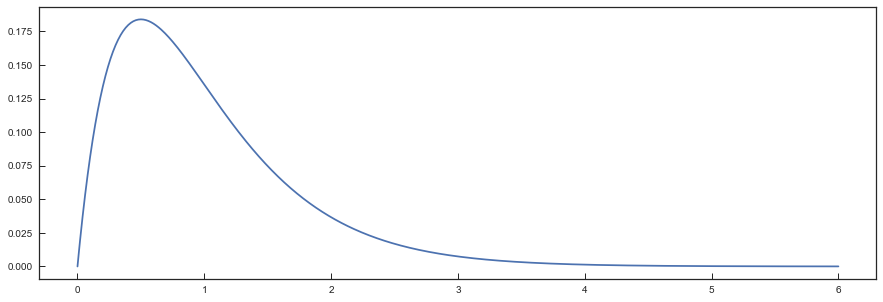

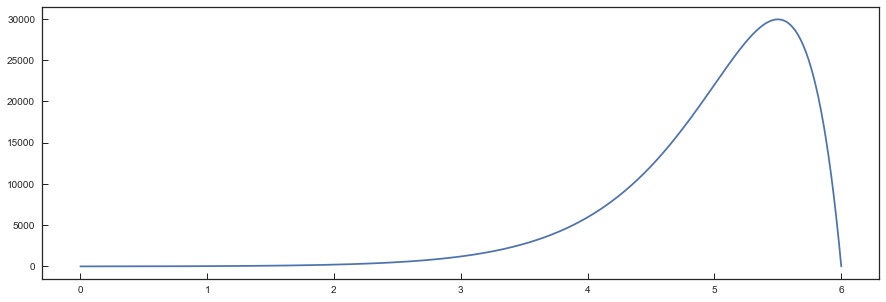

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


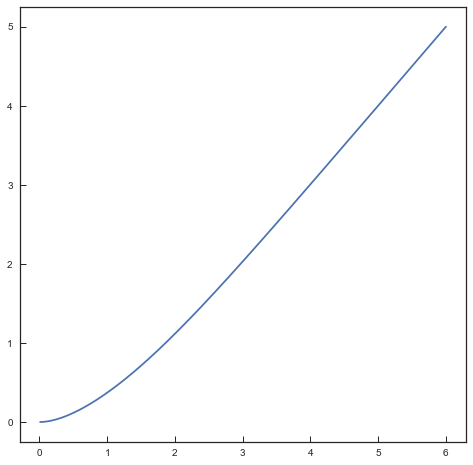

In [45]:
%matplotlib inline

plt.figure(figsize=[15,5])
plt.plot(ages,Delayed_tau(ages,.5))
plt.show()
plt.close()

plt.figure(figsize=[15,5])
plt.plot(ages,Age_distro(ages,.5))
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(ages,Avg_age(ages,.5))
plt.show()
plt.close()

In [ ]:
%matplotlib inline

print prob.T.shape

ultau = np.append(0, np.power(10, np.array(tau)[1:] - 9))

print ultau

for i in range(len(tau)-1):
    Me = []
    for ii in range(len(metal)):
        Ag = []
        for iii in range(len(age)):
            Ag.append(np.trapz(prob.T[ii][iii][:i+2],ultau[:i+2]))
        Me.append(Ag)
    
    
    Me= np.array(Me)
        
    Age=[]
    for ii in range(len(Me.T)):
        Age.append(np.trapz(Me.T[ii],metal))
    #   
    Cp=np.trapz(Age,age)

    Pr=Me.T/Cp

    x=np.argwhere(Pr==np.max(Pr))

    print x
    bfmetal,bfage=[metal[x[0][1]],age[x[0][0]]]

    onesig,twosig=Likelihood_contours(age,metal,Pr)
    levels=np.array([twosig,onesig])
    print levels    

    plt.figure(figsize=[8,8])
    plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
    plt.contourf(M,A,Pr,40,cmap=colmap)
    plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.gcf().subplots_adjust(bottom=0.16)
    plt.minorticks_on()
    plt.xlabel('Metallicity (Z$_\odot$)')
    plt.ylabel('Age (Gyrs)')
    plt.legend()
    plt.show()
    plt.close()

NameError: name 'prob' is not defined

[ 0.    0.1   0.2   0.3   0.4   0.5   0.6   0.71  0.79  0.89  1.    1.1
  1.2   1.29  1.41  1.51  1.58  1.7   1.82  1.91  2.    2.09  2.19  2.29
  2.4   2.51  2.57  2.69  2.82  2.88  3.02]


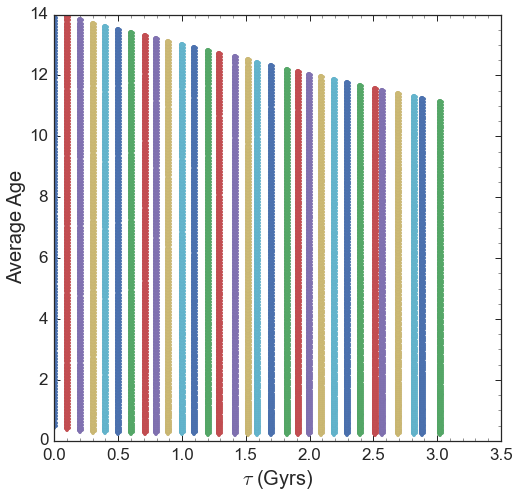

0.0   8.0     8.3    8.48    8.6   ...   9.41    9.43    9.45    9.46    9.48 
--- ------- ------- ------ ------- ... ------- ------- ------- ------- -------
nan  0.4083  0.3499  0.321   0.306 ...  0.2631  0.2627  0.2624  0.2622  0.2619
nan  0.5064  0.4366 0.3983  0.3776 ...  0.3167  0.3161  0.3156  0.3154  0.3149
nan  0.6056   0.527 0.4794  0.4526 ...  0.3709  0.3702  0.3695  0.3691  0.3685
nan  0.7052  0.6202 0.5639  0.5307 ...  0.4257  0.4248  0.4239  0.4235  0.4226
nan   0.805  0.7154 0.6511  0.6116 ...  0.4812    0.48  0.4789  0.4784  0.4773
nan   0.905  0.8121 0.7408  0.6951 ...  0.5373  0.5359  0.5345  0.5338  0.5325
nan  1.0049  0.9099 0.8326   0.781 ...  0.5941  0.5924  0.5907  0.5899  0.5883
nan  1.1049  1.0084  0.926  0.8688 ...  0.6515  0.6494  0.6474  0.6465  0.6446
nan  1.2049  1.1074 1.0208  0.9585 ...  0.7096  0.7071  0.7048  0.7037  0.7015
nan  1.3049  1.2067 1.1167  1.0497 ...  0.7682  0.7654  0.7627  0.7614  0.7589
...     ...     ...    ...     ... ...     ...     .

In [13]:
%matplotlib inline

def Average_age(age,tau):
    t=np.append([0],np.array(age))
    if tau==0:
        sfh=np.ones(len(t))
    else:
        sfh = np.exp(-t / np.power(10, tau - 9))
    avgage=np.zeros(len(age))

    # bottom=np.trapz(sfh,t)
    for i in range(len(age)):
        top=np.trapz(t[0:i+2]*sfh[0:i+2],t[0:i+2])
        # print t[0:i+2]
        # avgage[i]=top/bottom
        avgage[i]=top
    return avgage

age=np.arange(.5,14.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

ultau=np.round(np.append(0,np.power(10, np.array(tau)[1:] - 9)),2)

print ultau

a=np.linspace(0,14,1401)

treshape=[]
plt.figure(figsize=[8,8])
plt.plot(np.repeat(0, len(age)), age, 'o')
for i in range(len(tau)):
    perc = np.zeros(len(a) - 1)
    dage = np.zeros(len(a) - 1)
    avgage = np.zeros(len(a))
    sfh = np.exp(-a / np.power(10, tau[i] - 9)) / np.power(10, tau[i] - 9)
    for ii in range(len(a)-1):
        dage[0:ii+1]=dage[0:ii+1]+a[ii+1]-a[ii]
        perc[ii] = np.trapz(sfh[ii:ii + 2], a[ii:ii + 2])
        avgage[ii+1]=sum(dage*perc)/sum(perc)
    Avage=interp1d(a,avgage)(age)
    treshape.append(np.round(Avage,4))
    plt.plot(np.repeat(np.power(10, tau[i] - 9), len(age)), Avage, 'o')
plt.tick_params(axis='both', which='major', labelsize=17)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
plt.xlabel('$\\tau$ (Gyrs)',size=20)
plt.ylabel('Average Age',size=20)
plt.show()
plt.close()

dat=Table(treshape,names=np.array(tau).astype(str))

print dat
# ascii.write(dat,'../data/tau_scale_cluster.dat')

In [14]:
ascii.write(dat,'../data/tau_scale_cluster.dat')

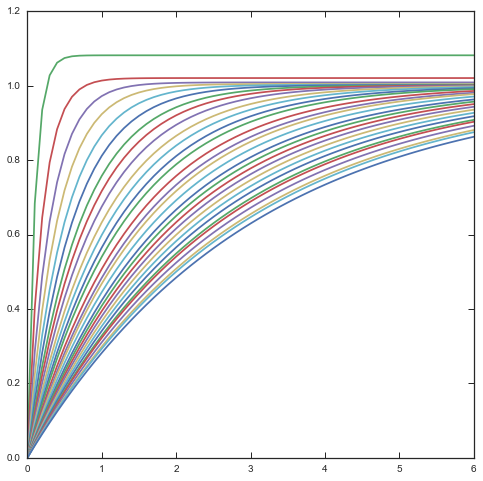

In [ ]:
%matplotlib inline

Age=np.arange(0,6.1,.1)

plt.figure(figsize=[8,8])
for i in range(len(ntau)):
    sfh = np.exp(-Age / np.power(10, ntau[i] - 9))/np.power(10, ntau[i] - 9)
    tmass=[]
    for ii in range(len(Age)):
        tmass.append(np.trapz(sfh[:ii+1],Age[:ii+1]))
        
    plt.plot(Age,tmass)
plt.show()
plt.close()

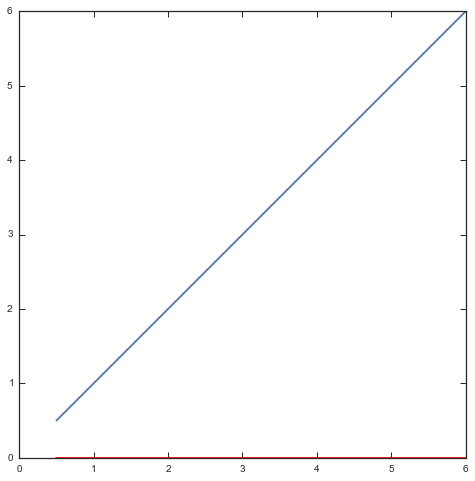

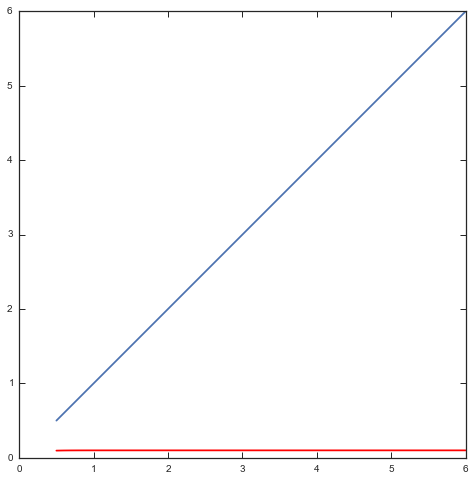

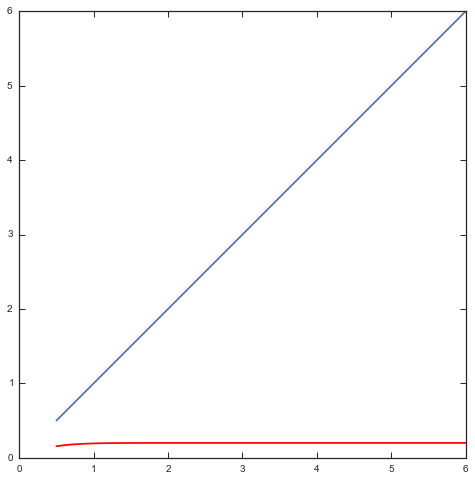

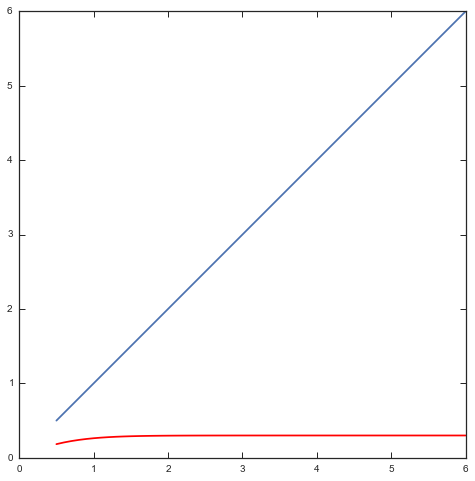

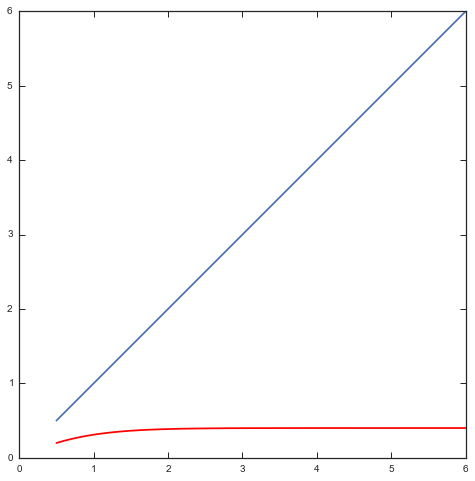

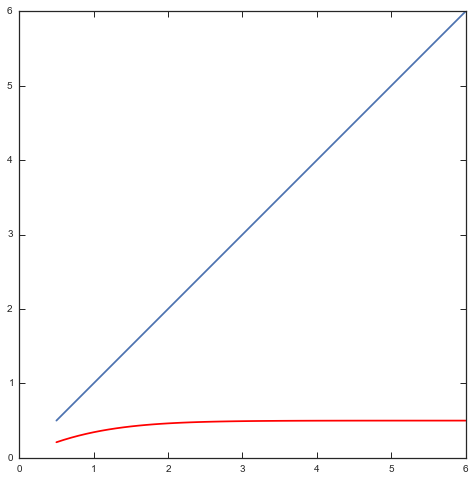

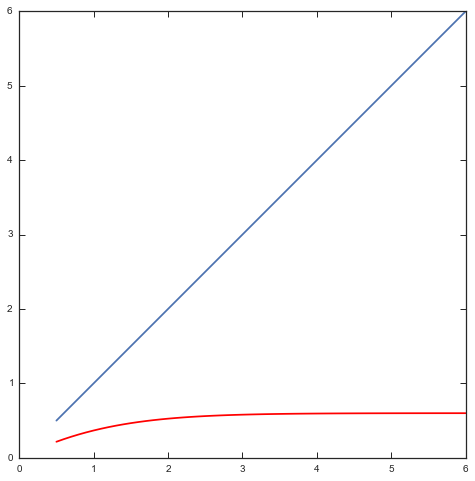

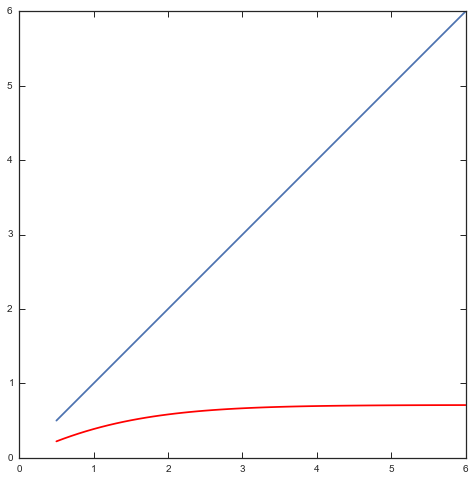

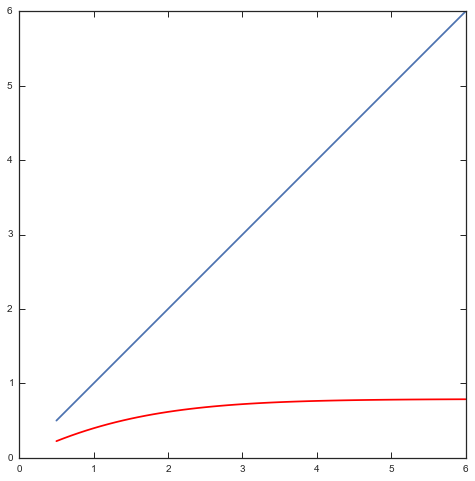

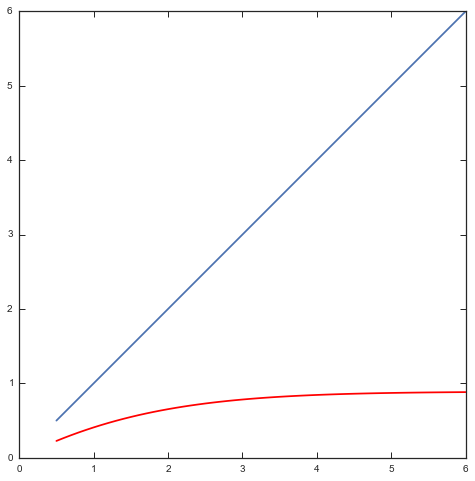

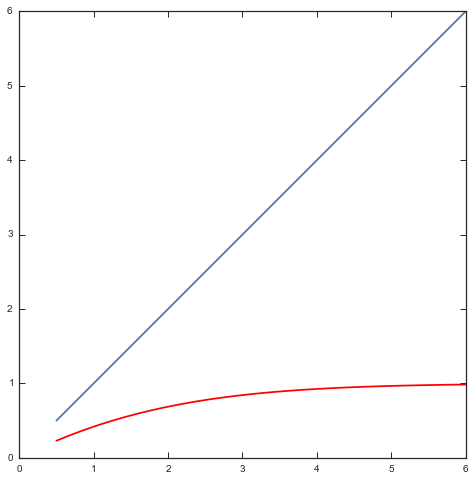

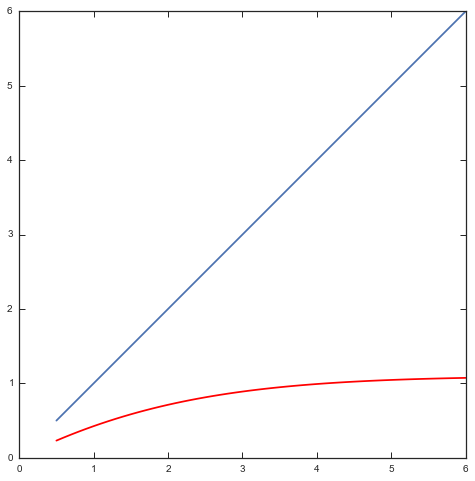

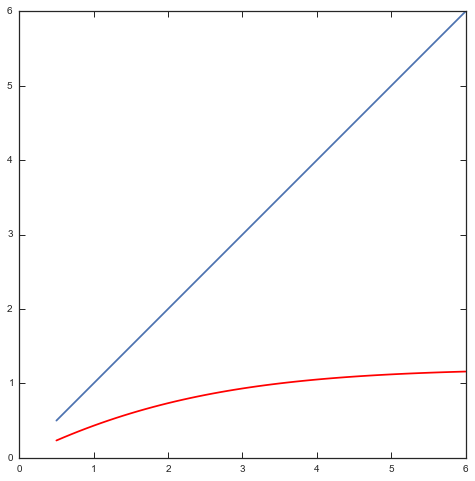

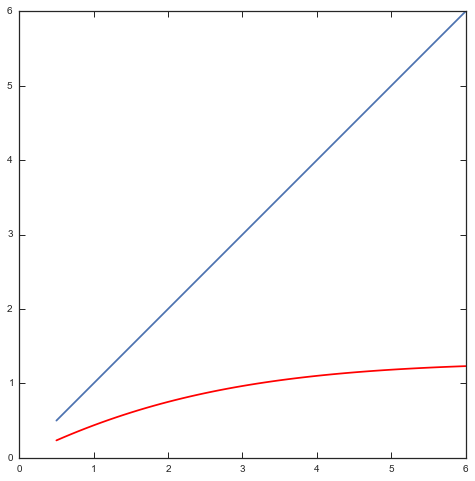

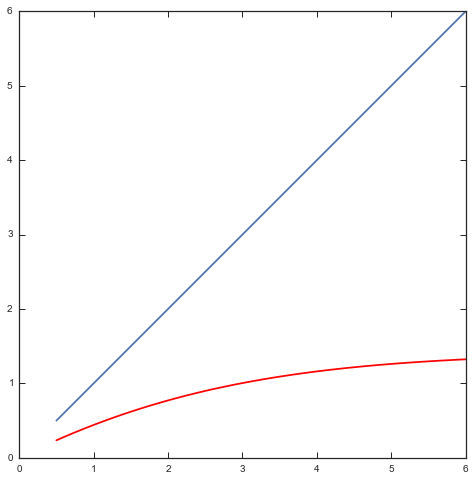

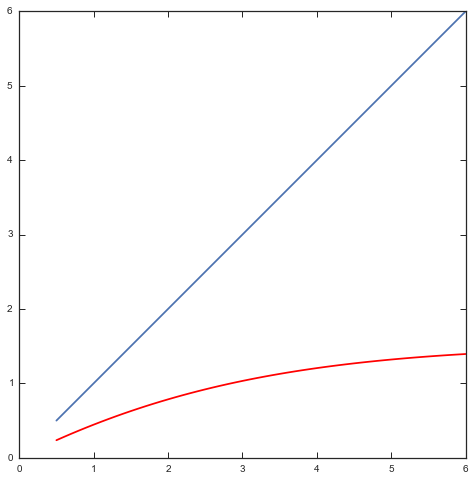

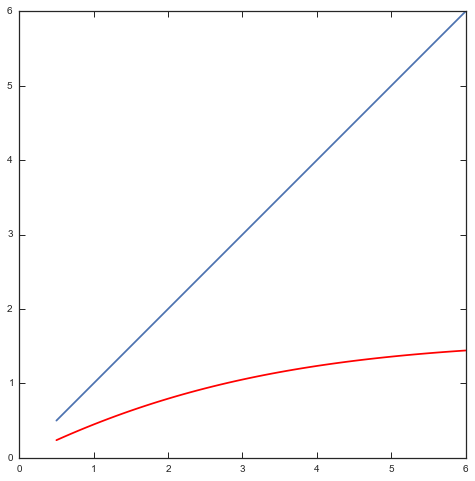

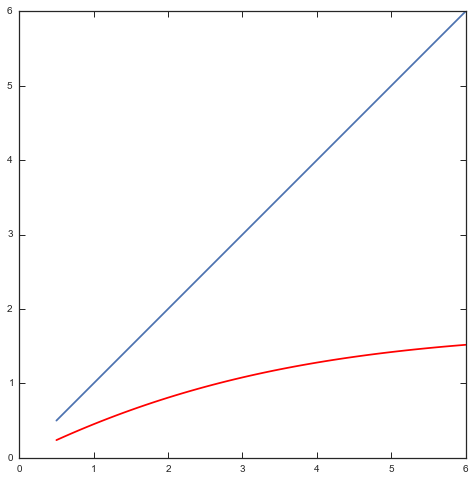

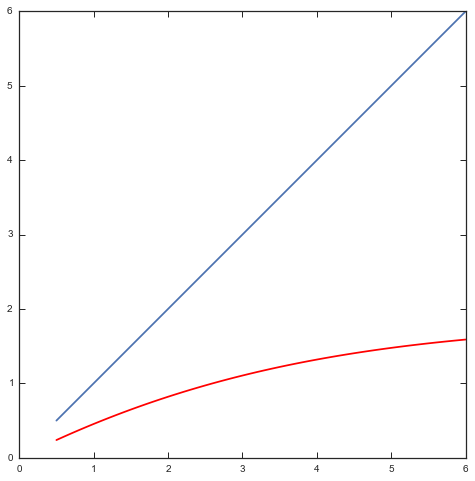

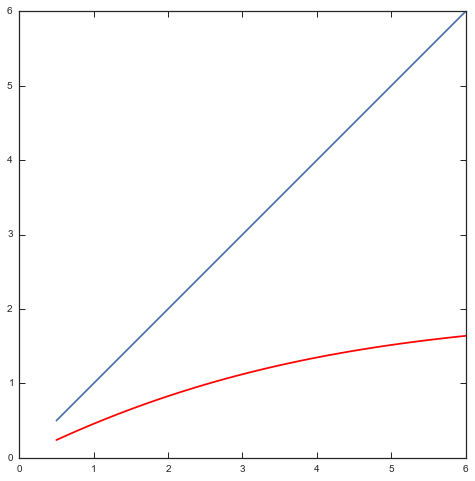

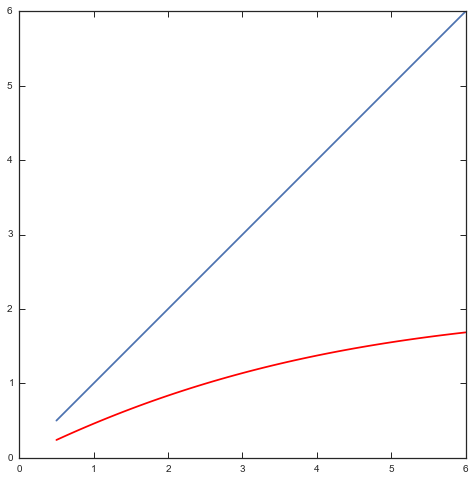

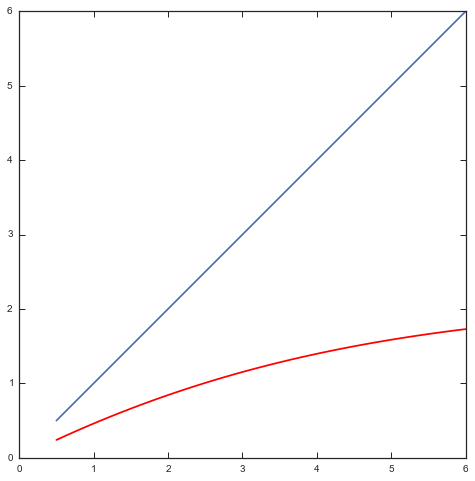

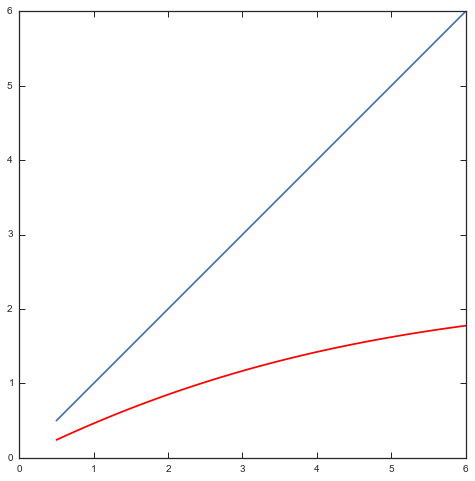

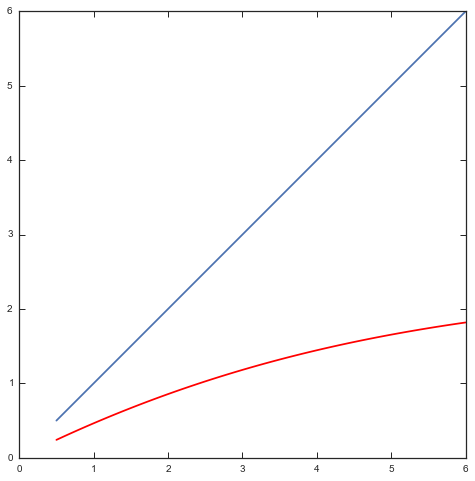

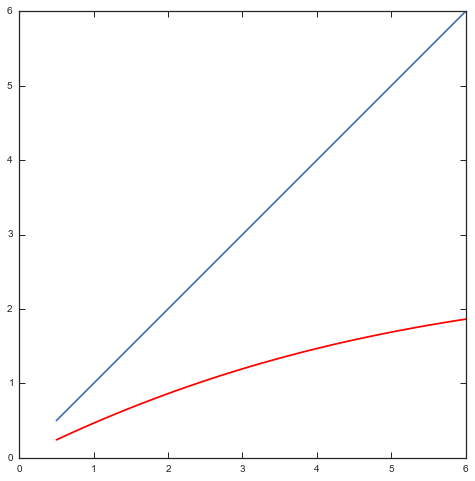

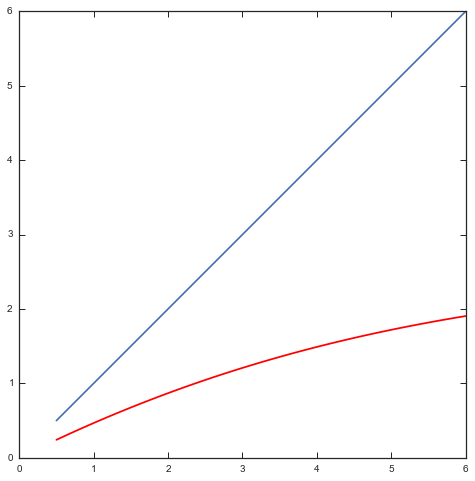

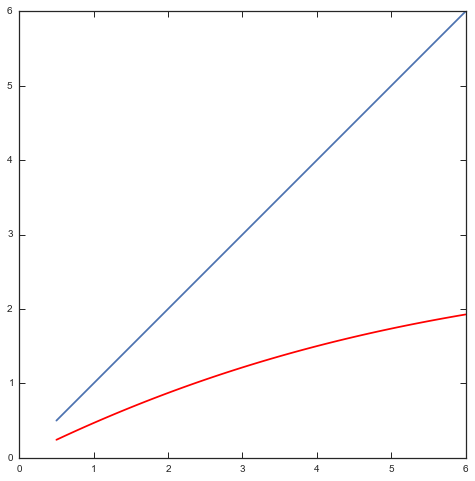

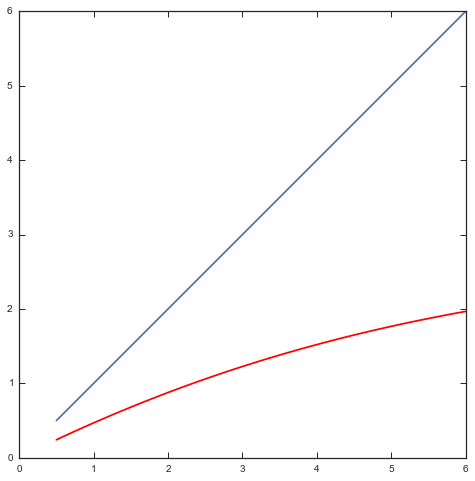

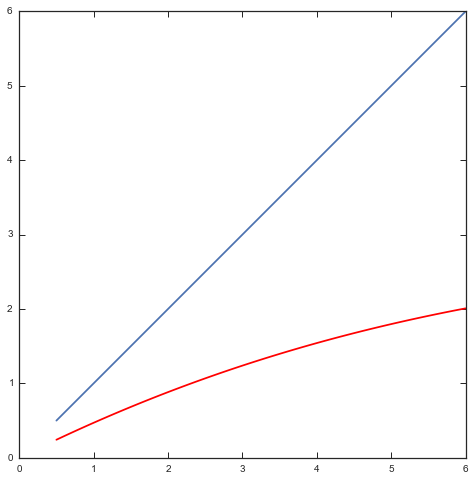

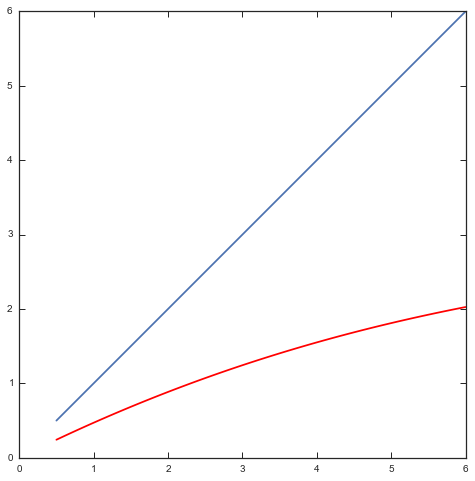

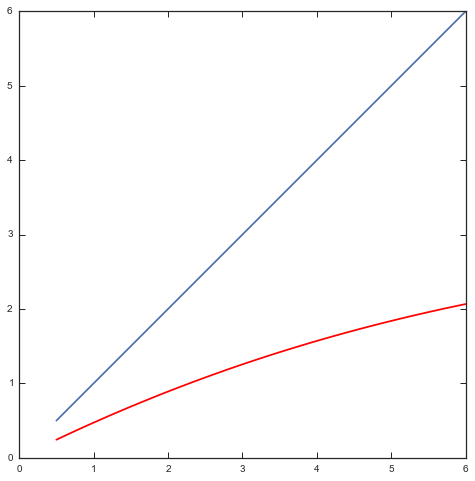

In [4]:
%matplotlib inline

def Avg_age(AGE,TAU):
    top=TAU-np.exp(-AGE/TAU)*(TAU + AGE)
    bottom=1-np.exp(-AGE/TAU)
    return top/bottom
ultau=np.round(np.append(0,np.power(10, np.array(ntau)[1:] - 9)),2)

for i in range(len(ultau)):
    avgage=Avg_age(age,ultau[i])
    plt.figure(figsize=[8,8])
    plt.plot(age,age)
    plt.plot(age,avgage,'r')
    plt.show()
    plt.close()